In [1]:
import gzip
import pandas as pd
import numpy as np
import pickle
import requests
import logging
import time
import random
import re
import json

f = open("token_TMDB.txt","r")
token = f.read()
headers = {"accept": "application/json", "Authorization": f"Bearer {token}"}

In [2]:
movies = pickle.load(open('movies2.pkl', 'rb'))

In [3]:
movies

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,keywords,overview,production_countries,production_companies
28768,tt0029284,My Favorite Wife,My Favorite Wife,1940,88,"Comedy,Romance","{'keywords': [{'id': 931, 'name': 'jealousy'},...",Years after she was presumed dead in a shipwre...,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 6, 'logo_path': '/n53F7K9scQWFXYbrCabl..."
30799,tt0031359,Gaslight,Gaslight,1940,84,"Mystery,Thriller","{'keywords': [{'id': 6038, 'name': 'marriage'}...",Twenty years removed from Alice Barlow's murde...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]","[{'id': 14197, 'logo_path': None, 'name': 'Bri..."
31405,tt0031976,The Stars Look Down,The Stars Look Down,1940,110,Drama,"{'keywords': [{'id': 6346, 'name': 'trade unio...",Davey Fenwick leaves his mining village on a u...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]","[{'id': 18700, 'logo_path': None, 'name': 'Gra..."
31600,tt0032179,21 Days Together,21 Days,1940,72,"Crime,Drama,Romance","{'keywords': [{'id': 171989, 'name': 'wrongful...",After Larry Darrent accidentally kills his lov...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]","[{'id': 659, 'logo_path': None, 'name': 'Londo..."
31602,tt0032181,Abe Lincoln in Illinois,Abe Lincoln in Illinois,1940,110,"Biography,Drama,History","{'keywords': [{'id': 5565, 'name': 'biography'...",Abe Lincoln in Illinois is a 1940 biographical...,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 6, 'logo_path': '/n53F7K9scQWFXYbrCabl..."
...,...,...,...,...,...,...,...,...,...,...
10698589,tt9907782,The Cursed,Eight for Silver,2021,111,"Fantasy,Horror,Mystery","{'keywords': [{'id': 394, 'name': 'gypsy'}, {'...","In the late 19th century, a brutal land baron ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 26065, 'logo_path': None, 'name': 'Pis..."
10698877,tt9908390,Le lion,Le lion,2020,95,Comedy,"{'keywords': [{'id': 5265, 'name': 'espionage'}]}",A psychiatric hospital patient pretends to be ...,"[{'iso_3166_1': 'FR', 'name': 'France'}]","[{'id': 90562, 'logo_path': '/qII3jJQ4S32FgJRl..."
10700132,tt9911196,The Marriage Escape,De beentjes van Sint-Hildegard,2020,103,"Comedy,Drama",{'keywords': []},Jan has been married to Gedda for 35 years. Ge...,"[{'iso_3166_1': 'NL', 'name': 'Netherlands'}]","[{'id': 60652, 'logo_path': '/pNlPbnwBkKgZsc2y..."
10702488,tt9916270,Il talento del calabrone,Il talento del calabrone,2020,84,Thriller,{'keywords': []},"Dj Steph is a young radio deejay on the rise, ...","[{'iso_3166_1': 'IT', 'name': 'Italy'}]","[{'id': 3110, 'logo_path': '/snpwZMXBOwbLSHqrn..."


In [4]:
ratings = pickle.load(open('ratings.pkl', 'rb'))

In [5]:
ratings

,tconst,averageRating,numVotes
13431,tt0029284,7.3,11501
15082,tt0031359,7.3,5264
15601,tt0031976,7.0,1178
15772,tt0032179,6.1,1276
15773,tt0032181,7.3,2052
...,...,...,...
1426695,tt9907782,6.2,16278
1426700,tt9908390,5.5,1407
1426818,tt9911196,7.4,3321
1427052,tt9916270,5.8,1480


In [6]:
movies = pd.merge(movies, ratings, on='tconst', how='inner')

In [7]:
movies

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,keywords,overview,production_countries,production_companies,averageRating,numVotes
0,tt0029284,My Favorite Wife,My Favorite Wife,1940,88,"Comedy,Romance","{'keywords': [{'id': 931, 'name': 'jealousy'},...",Years after she was presumed dead in a shipwre...,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 6, 'logo_path': '/n53F7K9scQWFXYbrCabl...",7.3,11501
1,tt0031359,Gaslight,Gaslight,1940,84,"Mystery,Thriller","{'keywords': [{'id': 6038, 'name': 'marriage'}...",Twenty years removed from Alice Barlow's murde...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]","[{'id': 14197, 'logo_path': None, 'name': 'Bri...",7.3,5264
2,tt0031976,The Stars Look Down,The Stars Look Down,1940,110,Drama,"{'keywords': [{'id': 6346, 'name': 'trade unio...",Davey Fenwick leaves his mining village on a u...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]","[{'id': 18700, 'logo_path': None, 'name': 'Gra...",7.0,1178
3,tt0032179,21 Days Together,21 Days,1940,72,"Crime,Drama,Romance","{'keywords': [{'id': 171989, 'name': 'wrongful...",After Larry Darrent accidentally kills his lov...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]","[{'id': 659, 'logo_path': None, 'name': 'Londo...",6.1,1276
4,tt0032181,Abe Lincoln in Illinois,Abe Lincoln in Illinois,1940,110,"Biography,Drama,History","{'keywords': [{'id': 5565, 'name': 'biography'...",Abe Lincoln in Illinois is a 1940 biographical...,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 6, 'logo_path': '/n53F7K9scQWFXYbrCabl...",7.3,2052
...,...,...,...,...,...,...,...,...,...,...,...,...
32175,tt9907782,The Cursed,Eight for Silver,2021,111,"Fantasy,Horror,Mystery","{'keywords': [{'id': 394, 'name': 'gypsy'}, {'...","In the late 19th century, a brutal land baron ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 26065, 'logo_path': None, 'name': 'Pis...",6.2,16278
32176,tt9908390,Le lion,Le lion,2020,95,Comedy,"{'keywords': [{'id': 5265, 'name': 'espionage'}]}",A psychiatric hospital patient pretends to be ...,"[{'iso_3166_1': 'FR', 'name': 'France'}]","[{'id': 90562, 'logo_path': '/qII3jJQ4S32FgJRl...",5.5,1407
32177,tt9911196,The Marriage Escape,De beentjes van Sint-Hildegard,2020,103,"Comedy,Drama",{'keywords': []},Jan has been married to Gedda for 35 years. Ge...,"[{'iso_3166_1': 'NL', 'name': 'Netherlands'}]","[{'id': 60652, 'logo_path': '/pNlPbnwBkKgZsc2y...",7.4,3321
32178,tt9916270,Il talento del calabrone,Il talento del calabrone,2020,84,Thriller,{'keywords': []},"Dj Steph is a young radio deejay on the rise, ...","[{'iso_3166_1': 'IT', 'name': 'Italy'}]","[{'id': 3110, 'logo_path': '/snpwZMXBOwbLSHqrn...",5.8,1480


In [8]:
relations = pickle.load(open('cast_crew.pkl', 'rb'))

In [9]:
relations 

,tconst,nconst,profession
325941,tt0029284,nm0002050,actress
325942,tt0029284,nm0000026,actor
325943,tt0029284,nm0000068,actor
325944,tt0029284,nm0665850,actress
325945,tt0029284,nm0794700,actress
...,...,...,...
10061808,tt9911196,nm2063122,writers
10064086,tt9916270,nm10538402,writers
10064086,tt9916270,nm1480867,writers
10064131,tt9916362,nm1893148,writers


In [10]:
people = pickle.load(open('people.pkl', 'rb'))

In [11]:
people

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0083922,tt0069467,tt0050976"
...,...,...,...,...,...,...
13419545,nm9992630,Karin Cherches,NaN,NaN,actress,tt5039088
13419614,nm9992750,Loghan Bazan,NaN,NaN,actress,tt8736336
13420288,nm9993535,Henry Lawfull,2006.0,NaN,actor,"tt10187208,tt5900600"
13420358,nm9993616,Ryan Mac Lennan,NaN,NaN,actor,tt4844148


In [12]:
relations = pd.merge(relations, people[['nconst', 'primaryName']], on='nconst', how='inner')

In [13]:
relations.to_csv('relations.csv')

In [31]:
relations

,tconst,nconst,profession,primaryName
0,tt0029284,nm0002050,actress,Irene Dunne
1,tt0029284,nm0000026,actor,Cary Grant
2,tt0029284,nm0000068,actor,Randolph Scott
3,tt0029284,nm0665850,actress,Gail Patrick
4,tt0029284,nm0794700,actress,Ann Shoemaker
...,...,...,...,...
415930,tt9911196,nm2063122,writers,Radek Bajgar
415931,tt9916270,nm10538402,writers,Lorenzo Collalti
415932,tt9916270,nm1480867,writers,Giacomo Cimini
415933,tt9916362,nm1893148,writers,Pablo Agüero


In [ ]:
relations['primaryName'] = relations['primaryName'].str.replace(' ', '_')

In [ ]:
cast_crew = relations.drop('profession', axis=1).groupby('tconst').agg(lambda x: ' '.join(x))

In [ ]:
movies = pd.merge(movies, cast_crew, on='tconst', how='inner')

In [32]:
people

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0083922,tt0069467,tt0050976"
...,...,...,...,...,...,...
13419545,nm9992630,Karin Cherches,NaN,NaN,actress,tt5039088
13419614,nm9992750,Loghan Bazan,NaN,NaN,actress,tt8736336
13420288,nm9993535,Henry Lawfull,2006.0,NaN,actor,"tt10187208,tt5900600"
13420358,nm9993616,Ryan Mac Lennan,NaN,NaN,actor,tt4844148


In [16]:
def get_keywords(row):
    if isinstance(row, list):  # Check if it's already a list
        kws = [kw['name'] for kw in row]
        return ' '.join(kws)
    elif isinstance(row, dict):  # If it's a dictionary, directly access 'keywords' key
        kws = [kw['name'] for kw in row['keywords']]
        return ' '.join(kws)
    else:
        return ''

In [17]:
def get_countries(data, separator=' '):
    if data is None:
        return ''
    
    top_countries = ['US', 'GB', 'CN', 'FR', 'JP', 'DE', 'KR', 'CA', 'AU', 'IN']
    
    countries = []
    for country in data:
        name = format_name(country['name'])
        if name not in top_countries:
            countries.append(name)
        
    return separator.join(countries)

In [18]:
def format_name(name):
    if name is None:
        return None
    name = re.sub(r'[^\w\s]', '', name)
    parts = name.split()
    return '_'.join(parts)

In [19]:
movies['production_countries'] = movies['production_countries'].apply(get_countries)

In [20]:
movies['keywords'] = movies['keywords'].apply(get_keywords)

In [21]:
movies.drop(columns=['production_companies'], inplace=True)

In [22]:
movies.to_csv('movies.csv')

In [ ]:
movies.to_pickle('data.pkl')

In [ ]:
movies.reset_index(inplace=True)

In [ ]:
def remove_quotes(text):
    if text is not None:
        return text.replace('"', '')
    else:
        return text

In [ ]:
def remove_commas(text):
    if text is not None:
        return text.replace(',', ' ')
    else:
        return text

In [ ]:
movies['overview'] = movies['overview'].apply(remove_quotes)

In [ ]:
movies['genres'] = movies['genres'].apply(remove_commas)
movies['overview'] = movies['overview'].apply(remove_commas)

movies

In [ ]:
movies.drop(columns='index', inplace=True)

In [ ]:
movies = movies.replace({',': '', '"': ''}, regex=True)

In [ ]:
def remove_punctuation(text):
    if isinstance(text, str):
        return re.sub(r'[^\w\s]', '', text)
    else:
        return text

# Apply the function to each cell in the DataFrame
movies = movies.applymap(remove_punctuation)

In [24]:
movies.to_csv('data.csv')

In [44]:
a = movies[['tconst','primaryTitle','startYear','runtimeMinutes','averageRating','numVotes']]

In [45]:
a.to_csv('bigdata.csv')

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

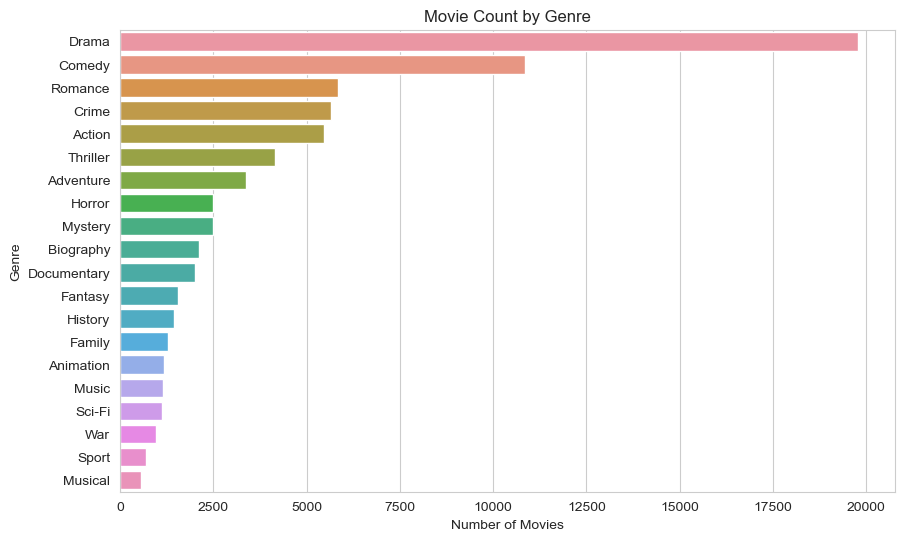

In [28]:
# Counting occurrences of each genre
genre_counts = (movies['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else x).explode().value_counts()
).head(20)
# Plot the countplot of genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Movie Count by Genre')
plt.show()

In [30]:
genre_counts.to_csv('genres.csv')

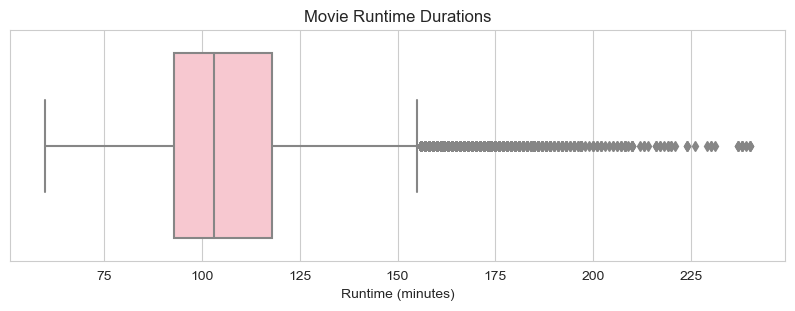

In [42]:
# Plotting the box plot of the runtime durations.
plt.figure(figsize=(10, 3))  # Adjusting the figure size
sns.boxplot(data=movies, x='runtimeMinutes', color='pink')  # Changing y to x
plt.xlabel('Runtime (minutes)')  # Adjusting the label to x-axis
plt.title('Movie Runtime Durations')  # Keeping the title as it is
plt.show()